In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date, timedelta
import csv
import ta
import matplotlib.pyplot as plt

In [2]:
# Download historical stock data for AAPL from Yahoo Finance
df=yf.download('AAPL',start="2014-01-01",end="2023-01-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.341547,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.960619,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.053106,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.931154,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.038370,258529600
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400


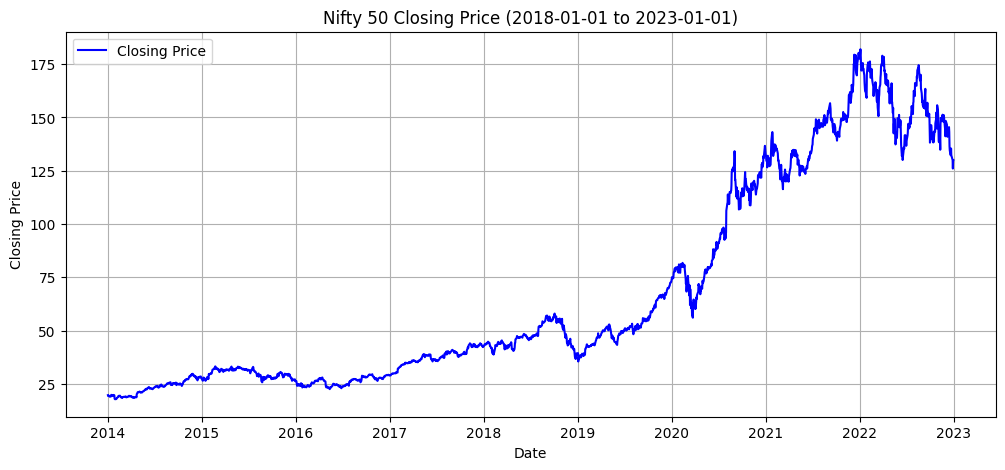

In [3]:
# Plot the closing price of AAPL
plt.figure(figsize=(12, 5))  # Set the figure size
plt.plot(df.index, df['Close'], label='Closing Price', color='b')
plt.title('Nifty 50 Closing Price (2018-01-01 to 2023-01-01)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

In [4]:
# Define a function to calculate the Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    # Calculate the price differences and positive/negative gains
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate average gains and losses over a rolling window
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculate the relative strength (RS) and the RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI and add it to the DataFrame
rsi=calculate_rsi(df,14)
df['RSI']=rsi

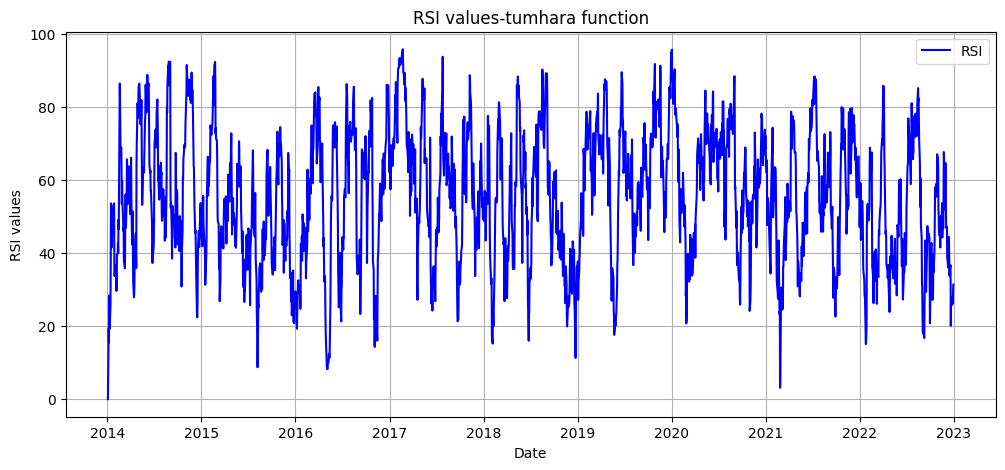

In [5]:
# Plot RSI values
plt.figure(figsize=(12, 5))  # Set the figure size
plt.plot(df.index, df['RSI'], label='RSI', color='b')
plt.title('RSI values-tumhara function')
plt.xlabel('Date')
plt.ylabel('RSI values')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Define a function to calculate On-Balance Volume (OBV)
def calculate_obv(data):
    obv = []
    obv.append(0)
    for i in range(1, len(data)):
        if data['Close'][i] > data['Close'][i - 1]:
            obv.append(obv[-1] + data['Volume'][i])
        elif data['Close'][i] < data['Close'][i - 1]:
            obv.append(obv[-1] - data['Volume'][i])
        else:
            obv.append(obv[-1])
    
    obv_series = pd.Series(obv, index=data.index)
    
    # Calculate Exponential Moving Average (EMA) of OBV
    obv_ema=obv_series.ewm(span=50).mean()
    return (obv_series,obv_ema)

# Calculate OBV and OBV Exponential Moving Average (EMA), and add them to the DataFrame
df['obv'],df['obv_ewm']=calculate_obv(df)
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,RSI,obv,obv_ewm
Date,,,,,,,,,
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.960619,392467600,0.000000,-392467600,-2.001585e+08
2014-01-06,19.194643,19.528570,19.057142,19.426071,17.053106,412610800,19.536323,20143200,-1.237680e+08
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.931154,317209200,15.534426,-297066000,-1.697260e+08
2014-01-08,19.243214,19.484285,19.238930,19.409286,17.038370,258529600,28.424798,-38536400,-1.413479e+08
2014-01-09,19.528570,19.530714,19.119642,19.161428,16.820793,279148800,21.703529,-317685200,-1.737531e+08
...,...,...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,26.261623,6180369800,6.621733e+09
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477600,69007800,27.960271,6111362000,6.601718e+09
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,26.152341,6025923600,6.579138e+09


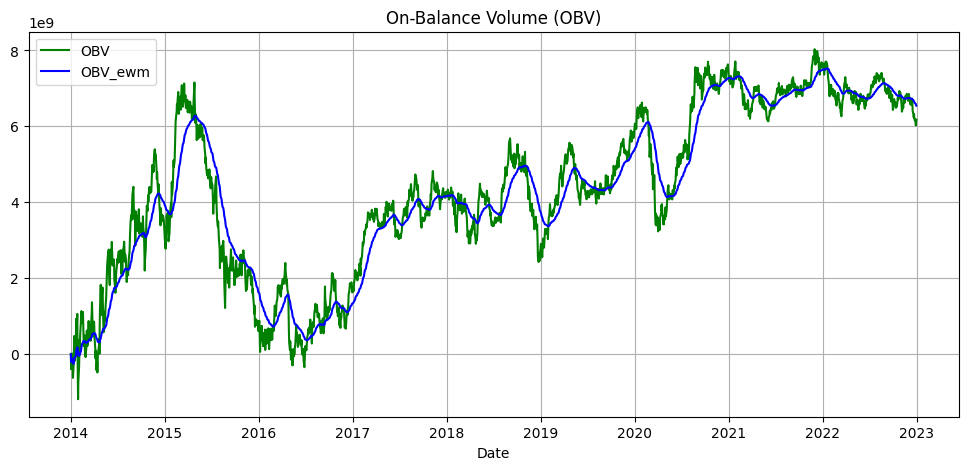

In [7]:
# Plot OBV and OBV EMA
plt.figure(figsize=(12, 5))  # Set the figure size
plt.plot(df['obv'], label='OBV', color='g')
plt.plot(df['obv_ewm'], label='OBV_ewm', color='b')
plt.title('On-Balance Volume (OBV)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Define trading strategy parameters
trade_type ='sell'  # Initial trade type
buy_price,sell_price=0,0  # Initialize buy and sell prices
trades=[]  # List to store trade information
buy = [np.nan] * len(df)  # Initialize buy signals in the DataFrame
sell = [np.nan] * len(df)  # Initialize sell signals in the DataFrame
Net_value=100000    # Initial portfolio value
net=100000   # Initialize net value

# Implement the main trading strategy
# OBV->On-Balance-Volume is used to identify the direction of trend
# obv<obv_ewm -> this shows down-trend  , obv>obv_ewm -> this shows up-trend
# RSI>85 -> shows that up-trend has tired and will go down
# RSI<35 -> shows that down-trend has tired and will go up
for i in range(5,len(df)):
    if trade_type =='buy':
        if df['obv'][i]>df['obv_ewm'][i] and df['RSI'][i]>85:  
            sell_price=df["Close"][i]
            trade_type ='sell'
            sell[i]=(df['Close'][i])
            net=net+n*(sell_price-buy_price)
            trades.append([df.index[i] , sell_price, trade_type,n*(sell_price-buy_price),net]) #4th part is showing profit/loss it is shown only during sell
        
    elif trade_type =='sell':
        if df['obv'][i]<df['obv_ewm'][i] or df['RSI'][i]<35:   
            buy_price=df["Close"][i]
            trade_type ='buy'
            buy[i]=(df['Close'][i])
            n=net/buy_price
            trades.append([df.index[i] , buy_price, trade_type,'no_profit_during_buy',net]) # during buy we don't add anything in 4th part as trade is just started 

# Initialize and calculate portfolio value
initial_capital=100000
portfolio_value=[]
portfolio_value.append(initial_capital)

# Calculate portfolio value over time based on executed trades
for i in range(len(trades)):
    if trades[i][2]=='buy':
        buy_price=trades[i][1]
        n=portfolio_value[-1]/buy_price
        
    elif trades[i][2]=='sell':
        sell_price=trades[i][1]
        portfolio_value.append(n*sell_price)

# Plot buy and sell signals on the price chart
df['buy']=buy
df['sell']=sell

In [9]:
# Save summary data to a CSV file
with open('summary.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Date', 'Buy/sell Price', 'Trade type', 'Profit/Loss', 'Portfolio Value'])
    csvwriter.writerows(trades[])

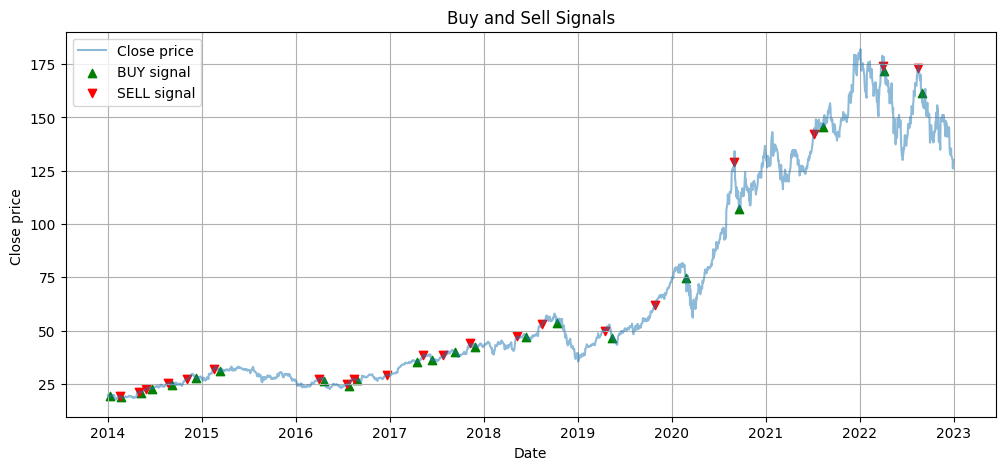

In [13]:
# Plot buy and sell signals on the price chart
df['buy'],df['sell']=buy,sell
plt.figure(figsize=(12,5))
plt.plot(df['Close'],label='Close price',alpha=0.5)
plt.scatter(df.index,df['buy'],color='green',label='BUY signal',marker='^',alpha=1)
plt.scatter(df.index,df['sell'],color='red',label='SELL signal',marker='v',alpha=1)
plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close price ')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Calculate daily returns for the portfolio
portfolio_returns = [0]  # Initialize with 0% return for the starting date
for i in range(1, len(trades)):
    if trades[i][2] == 'sell':
        buy_price = trades[i-1][1]
        sell_price = trades[i][1]  # Use the buy price of the next trade
        if(buy_price!=sell_price):
            portfolio_returns.append((sell_price - buy_price) / buy_price)
            
# portfolio_returns.remove(0)
        
# Convert portfolio returns to a Pandas Series
portfolio_returns = pd.Series(portfolio_returns) #, index=[trade[0] for i, trade in enumerate(trades[:]) if trade[2] == 'sell'])

# Calculate the Sharpe ratio
average_daily_return = portfolio_returns.mean()
std_daily_return = portfolio_returns.std()
sharpe_ratio = (average_daily_return / std_daily_return) * np.sqrt(252)  # Assuming 252 trading days in a year

# Calculate the strategy return
strategy_return = ((portfolio_value[-1]-initial_capital)/initial_capital)

# Number of executed trades
num_trades = len(trades) // 2

# Calculate maximum drawdown
cumulative_portfolio_value = pd.Series(portfolio_value) #, index=[trade[0] for i, trade in enumerate(trades[0:]) if trade[2] == 'sell'])
max_drawdown = (cumulative_portfolio_value / cumulative_portfolio_value.cummax() - 1).min()

# Calculate win ratio
wins=[]
loses=[]
for i in trades:
    if i[2]=='sell':
        if i[3]>=0:
            wins.append(i[3])
        if i[3]<0:
            loses.append(i[3])
            
win_ratio=len(wins)/num_trades

# Find largest loss-making trade
largest_loss_trade = min(loses)

# Find largest profit-making trade
largest_profit_trade = max(wins)


# Display the calculated metrics
print(f"Number of Executed Trades: {num_trades}")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Strategy Return: {strategy_return * 100:.2f}%")
print(f"Win Ratio: {win_ratio * 100:.2f}%")
print(f"Number of profit-Making Trades: {len(wins)}")
print(f"Number of Loss-Making Trades: {len(loses)}")
print(f"Largest Loss-Making Trade: {largest_loss_trade} ")
print(f"Largest Profit-Making Trade: {largest_profit_trade}")

Number of Executed Trades: 21
Maximum Drawdown: -16.26%
Sharpe Ratio: 11.182945160719061
Strategy Return: 927.96%
Win Ratio: 85.71%
Number of profit-Making Trades: 18
Number of Loss-Making Trades: 3
Largest Loss-Making Trade: -21091.2996124523 
Largest Profit-Making Trade: 270650.82958976354


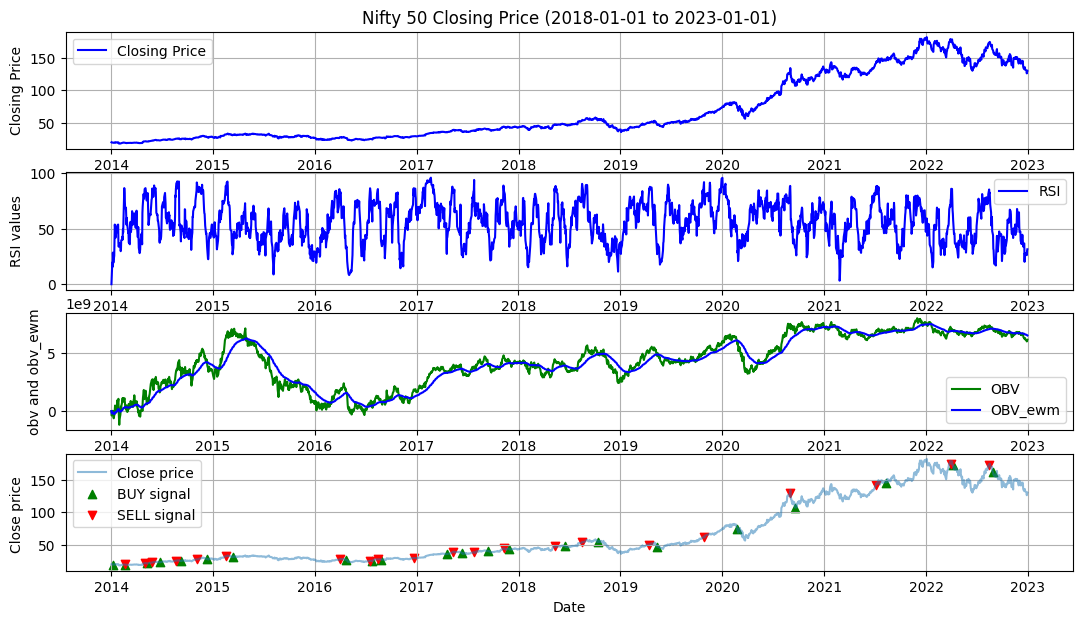

In [12]:
# Plot various charts to visualize the data and strategy
plt.figure(figsize=(13, 7))

plt.subplot(4,1,1)
plt.plot(df.index, df['Close'], label='Closing Price', color='b')
plt.title('Nifty 50 Closing Price (2018-01-01 to 2023-01-01)')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(df.index, df['RSI'], label='RSI', color='b')
plt.ylabel('RSI values')
plt.legend()
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(df['obv'], label='OBV', color='g')
plt.plot(df['obv_ewm'], label='OBV_ewm', color='b')
plt.ylabel('obv and obv_ewm')
plt.legend()
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(df['Close'],label='Close price',alpha=0.5)
plt.scatter(df.index,df['buy'],color='green',label='BUY signal',marker='^',alpha=1)
plt.scatter(df.index,df['sell'],color='red',label='SELL signal',marker='v',alpha=1)
plt.xlabel('Date')
plt.ylabel('Close price ')
plt.grid(True)
plt.legend()

plt.show()